In [1]:
#import imp modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
#read the data
data = pd.read_csv('drug200.csv')

In [4]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
#independent variable & dependent var 
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [13]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = data['Drug'].values

In [14]:
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [15]:
#transform data gender column 
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_gender.fit(['F','M'])
X[:,1] = le_gender.transform(X[:,1])

In [16]:
X[0:5]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.114],
       [28, 0, 'NORMAL', 'HIGH', 7.798],
       [61, 0, 'LOW', 'HIGH', 18.043]], dtype=object)

In [18]:
#transform data BP column 
from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()
le_BP.fit(['HIGH','LOW','NORMAL'])
X[:,2] = le_BP.transform(X[:,2])

In [19]:
X[0:5]

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.114],
       [28, 0, 2, 'HIGH', 7.798],
       [61, 0, 1, 'HIGH', 18.043]], dtype=object)

In [20]:
#transform data Cholestrol column 
from sklearn.preprocessing import LabelEncoder
le_chol = LabelEncoder()
le_chol.fit(['NORMAL','HIGH'])
X[:,3] = le_chol.transform(X[:,3])

In [21]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [22]:
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [23]:
set(y)

{'drugA', 'drugB', 'drugC', 'drugX', 'drugY'}

In [24]:
#transform data drug column 
from sklearn.preprocessing import LabelEncoder
le_Drug = LabelEncoder()
le_Drug.fit(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
y = le_Drug.transform(y)

In [25]:
y[0:5]

array([4, 2, 2, 3, 4])

In [27]:
#train test split
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X, y , test_size=0.2 , random_state=50)

In [31]:
#get the model
from sklearn.tree import DecisionTreeClassifier

In [32]:
cls = DecisionTreeClassifier(criterion='entropy')

In [33]:
#train the model

In [34]:
cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
#evaluation
y_pred = cls.predict(x_test)

In [36]:
#check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.975

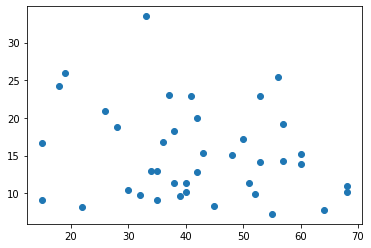

In [37]:
plt.scatter(x_test[:,0],x_test[:,-1])

In [ ]:
#{'drugA', 'drugB', 'drugC', 'drugX', 'drugY'}


In [38]:
colorset = np.array(['red','blue','yellow','green','black'])

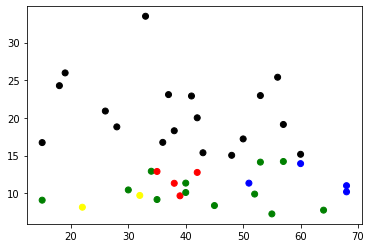

In [39]:
plt.scatter(x_test[:,0],x_test[:,-1], c = colorset[y_test])

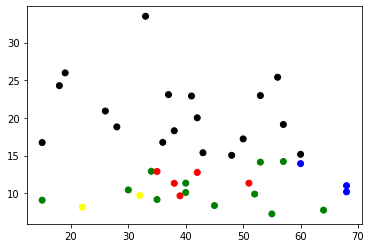

In [40]:
plt.scatter(x_test[:,0],x_test[:,-1], c = colorset[y_pred])